In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

locators = pd.read_csv("locators.csv")
dists = pd.read_csv("approx_dists.csv")

locators.columns = ["x", "y"]
dists.columns = ["d"]

x = locators["x"].values
y = locators["y"].values
d = dists["d"].values


In [5]:
A = []
b = []

x1, y1, d1 = x[0], y[0], d[0]

for i in range(1, len(x)):
    A.append([2*(x[i]-x1), 2*(y[i]-y1)])
    b.append(d1**2 - d[i]**2 + x[i]**2 - x1**2 + y[i]**2 - y1**2)

A = np.array(A)
b = np.array(b)


In [6]:
pos, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

bx, by = pos
print("Battleship coordinates:", bx, by)


Battleship coordinates: 32.07528679380542 92.04840702179084


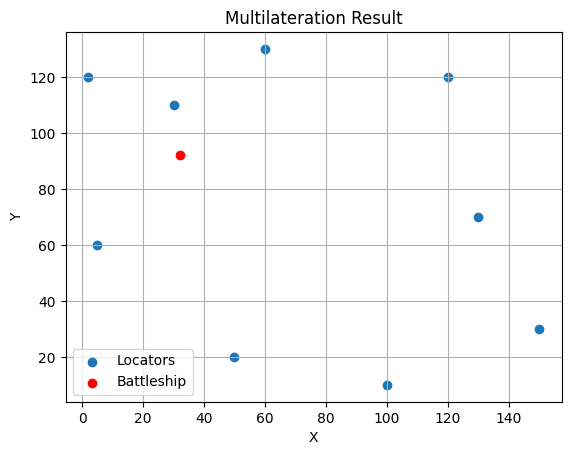

In [7]:
plt.scatter(x, y, label="Locators")
plt.scatter(bx, by, color="red", label="Battleship")

plt.legend()
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Multilateration Result")
plt.show()
